In [3]:
pip install datasets transformers torch

In [4]:
# import CIFAR-10 dataset from HuggingFace
from datasets import load_dataset

dataset_train = load_dataset(
    'cifar10',
    split='train', # training dataset
    ignore_verifications=False  # set to True if seeing splits Error
)

dataset_train

c:\Users\keera\anaconda3\lib\site-packages\datasets\load.py:2516: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=all_checks' instead.
  warnings.warn(


Dataset({
    features: ['img', 'label'],
    num_rows: 50000
})

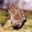

In [5]:
dataset_train[49090]['img']

In [102]:
dataset_train[777]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x20414B66580>,
 'label': 3}

In [6]:
dataset_test = load_dataset(
    'cifar10',
    split='test', # training dataset
    ignore_verifications=True  # set to True if seeing splits Error
)

dataset_test

c:\Users\keera\anaconda3\lib\site-packages\datasets\load.py:2516: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Dataset({
    features: ['img', 'label'],
    num_rows: 10000
})

In [7]:
# check how many labels/number of classes
num_classes = len(set(dataset_train['label']))
labels = dataset_train.features['label']
num_classes, labels

(10,
 ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None))

In [8]:
dataset_train[0]['label'], labels.names[dataset_train[0]['label']]

(0, 'airplane')

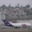

In [9]:
dataset_train[0]['img']

In [10]:
dataset_train[0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x2045D15FC70>,
 'label': 0}

In [11]:
from transformers import ViTFeatureExtractor

# import model
model_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(
    model_id
)

c:\Users\keera\anaconda3\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [12]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [13]:
example = feature_extractor(
    dataset_train[0]['img'],
    return_tensors='pt'
)
example

{'pixel_values': tensor([[[[ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          ...,
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863]],

         [[ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          ...,
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412]],

         [[ 0.4824,  0.4824,  0.4824,  ...,  0.3647,  0.3647,  0.3647],
          [ 0

In [14]:
labels.names[dataset_train[10243]['label']]


'deer'

In [15]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np

example = feature_extractor(
    dataset_train[0]['img'],
    return_tensors='pt'
)
example



{'pixel_values': tensor([[[[ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          ...,
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863]],

         [[ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          ...,
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412]],

         [[ 0.4824,  0.4824,  0.4824,  ...,  0.3647,  0.3647,  0.3647],
          [ 0

In [17]:
example['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [18]:
# load in relevant libraries, and alias where appropriate
import torch

# device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [19]:
def preprocess(batch):
    # take a list of PIL images and turn them to pixel values
    inputs = feature_extractor(
        batch['img'],
        return_tensors='pt'
    )
    # include the labels
    inputs['label'] = batch['label']
    return inputs

In [20]:
# transform the training dataset
prepared_train = dataset_train.with_transform(preprocess)
# ... and the testing dataset
prepared_test = dataset_test.with_transform(preprocess)

In [21]:
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [22]:
import numpy as np
from datasets import load_metric

# accuracy metric
metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(
        predictions=np.argmax(p.predictions, axis=1),
        references=p.label_ids
    )

C:\Users\keera\AppData\Local\Temp\ipykernel_6604\3243213926.py:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
c:\Users\keera\anaconda3\lib\site-packages\datasets\load.py:753: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [23]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install accelerate -U

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install accelerate>=0.21.0

Note: you may need to restart the kernel to use updated packages.


In [26]:
from transformers import ViTForImageClassification

labels = dataset_train.features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_id,  # classification head
    num_labels=len(labels)
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [28]:
! pip install -U accelerate
! pip install -U transformers

In [30]:
from transformers import Trainer
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./cifar",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_train,
    eval_dataset=prepared_test,
    tokenizer=feature_extractor,
)

In [31]:
train_results = trainer.train()
# save tokenizer with the model
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
# save the trainer state
trainer.save_state()

  0%|          | 0/12500 [00:00<?, ?it/s]

{'loss': 2.0781, 'grad_norm': 2.8752591609954834, 'learning_rate': 0.00019984, 'epoch': 0.0}
{'loss': 1.6153, 'grad_norm': 2.395355701446533, 'learning_rate': 0.00019968, 'epoch': 0.01}
{'loss': 1.2487, 'grad_norm': 3.1706387996673584, 'learning_rate': 0.00019952000000000001, 'epoch': 0.01}


KeyboardInterrupt: 

In [32]:
metrics = trainer.evaluate(prepared_test)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

  0%|          | 0/1250 [00:00<?, ?it/s]

{'eval_loss': 0.8828220963478088, 'eval_accuracy': 0.9173, 'eval_runtime': 38608.5826, 'eval_samples_per_second': 0.259, 'eval_steps_per_second': 0.032, 'epoch': 0.01}
***** eval metrics *****
  epoch                   =        0.01
  eval_accuracy           =      0.9173
  eval_loss               =      0.8828
  eval_runtime            = 10:43:28.58
  eval_samples_per_second =       0.259
  eval_steps_per_second   =       0.032


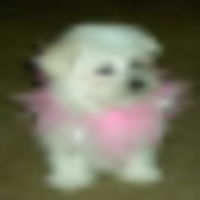

In [37]:
# show the first image of the testing dataset
image = dataset_test["img"][3000].resize((200,200))
image

In [38]:
# extract the actual label of the first image of the testing dataset
actual_label = dataset_test["label"][3000]

labels = dataset_test.features['label']
actual_label, labels.names[actual_label]

(5, 'dog')

In [39]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# import our fine-tuned model
model_name_or_path = 'LaCarnevali/vit-cifar10'
model_finetuned = ViTForImageClassification.from_pretrained(model_name_or_path)
# import features
feature_extractor_finetuned = ViTFeatureExtractor.from_pretrained(model_name_or_path)

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

c:\Users\keera\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\keera\.cache\huggingface\hub\models--LaCarnevali--vit-cifar10. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

c:\Users\keera\anaconda3\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [40]:
inputs = feature_extractor_finetuned(image, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

In [41]:
predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
labels.names[predicted_label]

'dog'

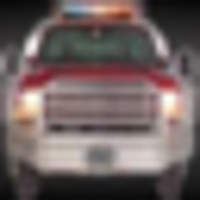

In [47]:
image = dataset_test["img"][3450].resize((200,200))
image

In [56]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [51]:
inputs = feature_extractor_finetuned(image, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
labels.names[predicted_label]

'horse'

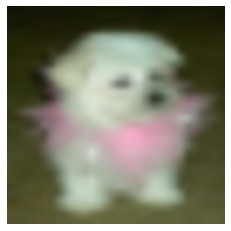

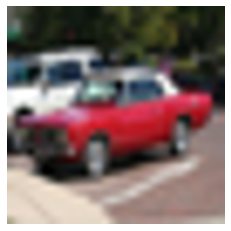

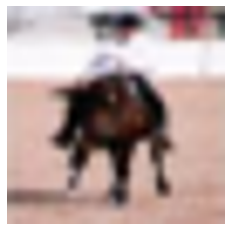

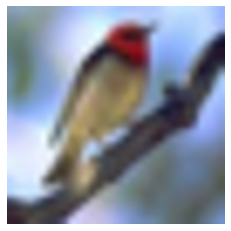

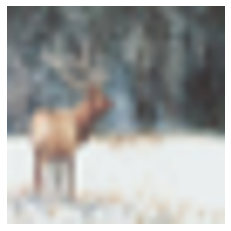

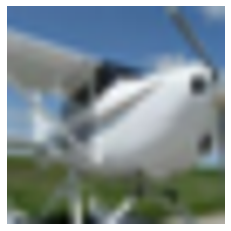

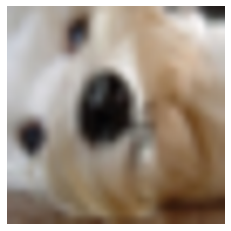

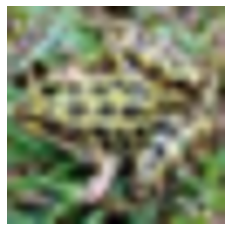

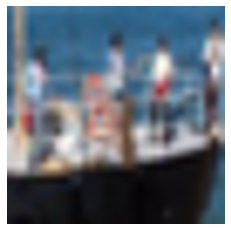

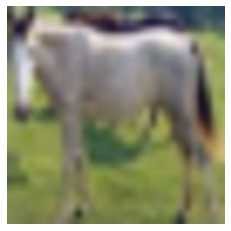

In [59]:
import matplotlib.pyplot as plt 

for i in range(3000,3010):
    image = dataset_test["img"][i].resize((200,200))
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()


In [55]:
for i in range(3000,3010):
    image = dataset_test["img"][i].resize((200,200))
    inputs = feature_extractor_finetuned(image, return_tensors="pt")

    with torch.no_grad():
        logits = model_finetuned(**inputs).logits

    predicted_label = logits.argmax(-1).item()
    labels = dataset_test.features['label']
    print(labels.names[predicted_label])


dog
automobile
horse
bird
deer
airplane
dog
frog
ship
horse


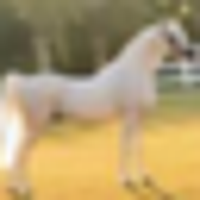

In [83]:
image = dataset_test["img"][4010].resize((200,200))
image

In [84]:
inputs = feature_extractor_finetuned(image, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
print(labels.names[predicted_label])

horse


In [73]:
image = dataset_test[3]
image

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x2041450C1F0>,
 'label': 0}

In [92]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [108]:
example = feature_extractor(
    image,
    return_tensors='pt'
)
example

{'pixel_values': tensor([[[[ 0.3255,  0.3255,  0.3255,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.3255,  0.3255,  0.3255,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.3255,  0.3255,  0.3255,  ...,  0.5529,  0.5529,  0.5529],
          ...,
          [-0.8353, -0.8353, -0.8353,  ..., -0.9137, -0.9137, -0.9137],
          [-0.8353, -0.8353, -0.8353,  ..., -0.9137, -0.9137, -0.9137],
          [-0.8353, -0.8353, -0.8353,  ..., -0.9137, -0.9137, -0.9137]],

         [[ 0.3176,  0.3176,  0.3176,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.3176,  0.3176,  0.3176,  ...,  0.5529,  0.5529,  0.5529],
          [ 0.3176,  0.3176,  0.3176,  ...,  0.5529,  0.5529,  0.5529],
          ...,
          [-0.8353, -0.8353, -0.8353,  ..., -0.9059, -0.9059, -0.9059],
          [-0.8353, -0.8353, -0.8353,  ..., -0.9059, -0.9059, -0.9059],
          [-0.8353, -0.8353, -0.8353,  ..., -0.9059, -0.9059, -0.9059]],

         [[ 0.3020,  0.3020,  0.3020,  ...,  0.5294,  0.5294,  0.5294],
          [ 0

In [136]:
from PIL import Image

# Load the original image
image_path = "DOGGY.png"  # Replace "original_image.png" with the actual filename of your image
original_image = Image.open(image_path)

# Resize the image to 32x32 pixels
resized_image = original_image.resize((32, 32))

# Save the resized image
resized_image.save("SMALLDOGGY.png")


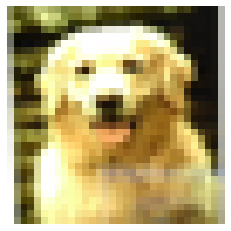

[[[135 139  89]
  [ 91  90  25]
  [110 108  45]
  ...
  [ 17  16  14]
  [ 21  20  19]
  [182 182 177]]

 [[132 135  75]
  [ 71  70   6]
  [ 82  81  21]
  ...
  [ 17  15  16]
  [ 20  20  17]
  [182 182 176]]

 [[167 173 114]
  [133 136  54]
  [ 74  74  12]
  ...
  [ 17  15  16]
  [ 20  20  16]
  [182 182 175]]

 ...

 [[255 255 255]
  [114 116  90]
  [ 43  34   1]
  ...
  [215 211 136]
  [185 179 111]
  [183 179 143]]

 [[255 255 255]
  [114 116  97]
  [ 52  50   8]
  ...
  [180 172  99]
  [167 161  91]
  [172 169 138]]

 [[255 255 255]
  [135 138 106]
  [ 70  68   9]
  ...
  [151 135  67]
  [150 140  68]
  [170 165 130]]]
(32, 32, 3)


In [169]:
from PIL import Image
import numpy as np

# Load the image
image_path = "SMALLDOGGY.png"  # Replace "image.png" with the actual filename of your image
image = Image.open(image_path)

# Convert the image to a numpy array
dog_image = image.convert('RGB')
doggy = np.array(dog_image)

plt.imshow(doggy)
plt.axis('off')  # Turn off axis
plt.show()
print(doggy)
print(doggy.shape)

In [170]:
inputs = feature_extractor_finetuned(doggy, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
print('This is a photo of a', labels.names[predicted_label])

This is a photo of a dog


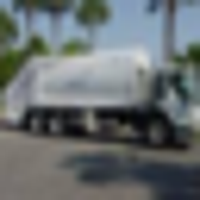

In [167]:
bri = dataset_test[4929]['img'].resize((200,200))
bri

In [168]:
inputs = feature_extractor_finetuned(bri, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
print(labels.names[predicted_label])

truck


In [244]:
from PIL import Image

# Load the original image
image_path = "cartoon_plane.jpg"  # Replace "original_image.png" with the actual filename of your image
original_image = Image.open(image_path)

# Resize the image to 32x32 pixels
resized_image = original_image.resize((32, 32))

# Save the resized image
resized_image.save("smallmark.png")

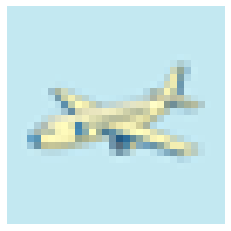

(32, 32, 3)


In [245]:
from PIL import Image
import numpy as np

# Load the image
image_path = "smallmark.png"  # Replace "image.png" with the actual filename of your image
image = Image.open(image_path)

# Convert the image to a numpy array
mark_image = image.convert('RGB')
mark = np.array(mark_image)

plt.imshow(mark)
plt.axis('off')  # Turn off axis
plt.show()
#print(mark)
print(mark.shape)

In [246]:
inputs = feature_extractor_finetuned(mark, return_tensors="pt")

with torch.no_grad():
    logits = model_finetuned(**inputs).logits

predicted_label = logits.argmax(-1).item()
labels = dataset_test.features['label']
print('This is a photo of a', labels.names[predicted_label])

This is a photo of a airplane
